In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
data = pd.read_csv('clean_tables/before_normalization/df_continuous_dx')

In [25]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'sex', 'age_years', 'years_education',
       'APOE4', 'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR',
       'LWMV', 'DX'],
      dtype='object')

In [26]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['APOE4'] = label_encoder.fit_transform(data['APOE4'])
data['family_dementia_history'] = label_encoder.fit_transform(data['family_dementia_history'])
data['DX'] = label_encoder.fit_transform(data['DX'])

In [27]:
# minmax normalization
scaler = StandardScaler()
data[['age_years', 'years_education', 'APOE4', 'ptau_result', 'ttau_result', 'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR']] = scaler.fit_transform(data[['age_years', 'years_education', 'APOE4', 'ptau_result', 'ttau_result', 'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR']])

In [29]:
data

,Unnamed: 0.1,Unnamed: 0,sex,age_years,years_education,APOE4,family_dementia_history,ptau_result,ttau_result,abeta42_result,mmse_total,gds_total,cdr_sob,LHVL,LHVR,LWMV,DX
0,0,0,0,-1.562360,-1.277816,-0.910295,1,-0.439296,1.477295,0.576246,0.383019,-2.222585,1.646639,-1.694589,-0.516950,-0.723,0
1,1,1,1,0.540129,-1.591885,1.661818,1,0.285095,0.234091,1.499567,-0.376715,-0.335247,-0.950692,0.273834,0.015974,0.000,1
2,2,2,0,-0.721364,-0.335610,-0.910295,1,-0.055149,-0.007643,0.694059,0.003152,0.009734,-0.258070,-0.628317,-0.649693,0.210,0
3,4,4,1,-1.141862,1.234734,1.661818,1,-1.350274,-0.375999,-0.160766,1.902488,-0.335247,0.607707,-0.897151,-0.144098,-0.827,0
4,5,5,0,0.876527,1.234734,1.661818,1,2.315587,0.326181,0.483092,0.762887,0.797156,-1.123848,-0.007081,-0.671166,0.379,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,893,893,1,1.128826,-1.277816,-0.910295,1,-0.538077,-1.412002,1.222845,-0.756582,0.009734,0.954018,-0.436006,-0.140194,1.246,0
725,894,894,0,0.287830,0.920665,-0.910295,1,0.361925,1.051383,0.195411,-1.516317,0.419689,0.261396,1.352188,0.657240,0.554,0
726,897,897,1,0.960627,-0.649679,0.375761,1,0.153388,2.064363,1.499567,0.003152,2.684494,0.780862,0.358411,1.271177,-1.433,0
727,898,898,1,0.035532,0.292528,0.375761,1,0.658267,1.131961,-1.089567,-0.756582,1.929559,1.646639,0.485276,-0.100176,1.524,0


In [51]:
# Select features and target variable
X = data[['sex', 'age_years', 'years_education',
       'APOE4', 'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR',
       'LWMV']]
y = data['DX']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [46]:
X_train.shape

(583, 14)

In [47]:
X_test.shape

(146, 14)

In [48]:
y_train.shape

(583,)

In [50]:
y_test.shape

(146,)

Accuracy: 1.0
Confusion Matrix:
 [[88  0  0]
 [ 0 36  0]
 [ 0  0 22]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        22

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



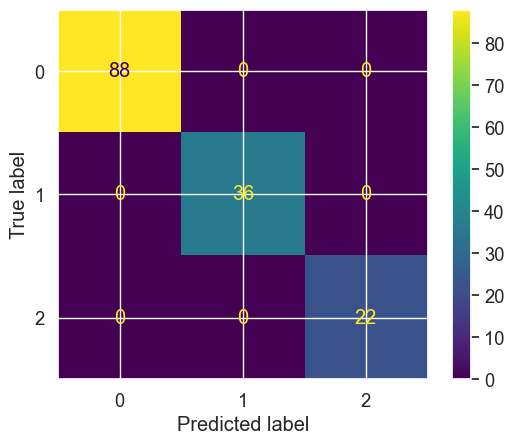

In [52]:
# Random Forest as an example
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
cm_display.plot(values_format='d')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

Accuracy: 1.0
Confusion Matrix:
 [[88  0  0]
 [ 0 36  0]
 [ 0  0 22]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        22

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



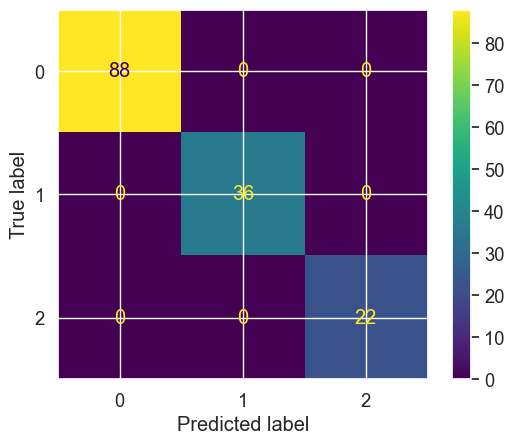

In [53]:
# Naive_bayes as an example
model_nb = GaussianNB()

# Train the model
model_nb.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
cm_display.plot(values_format='d')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

Accuracy: 1.0
Confusion Matrix:
 [[88  0  0]
 [ 0 36  0]
 [ 0  0 22]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        22

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



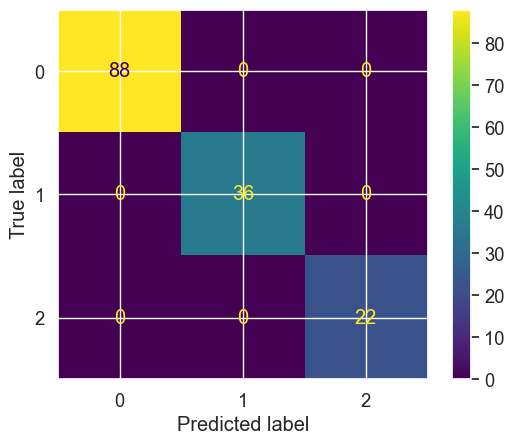

In [54]:
# MLP
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)

# Train the model
model_mlp.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
cm_display.plot(values_format='d')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)